In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [2]:
d01 = xr.open_dataset("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_shortlead/wrfout_d01_2023-10-16_03:00:00")
d02 = xr.open_dataset("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_shortlead/wrfout_d02_2023-10-16_03:00:00")
d03 = xr.open_dataset("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_shortlead/wrfout_d03_2023-10-16_03:00:00")
d04 = xr.open_dataset("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_shortlead/wrfout_d04_2023-10-16_03:00:00")

0.3.0


In [3]:
ramssa = xr.open_dataset("/g/data/eg3/ab4502/WRF/WPS/ramssa_data/20231016120000-ABOM-L4_GHRSST-SSTfnd-RAMSSA_09km-AUS-v02.0-fv01.0.nc")

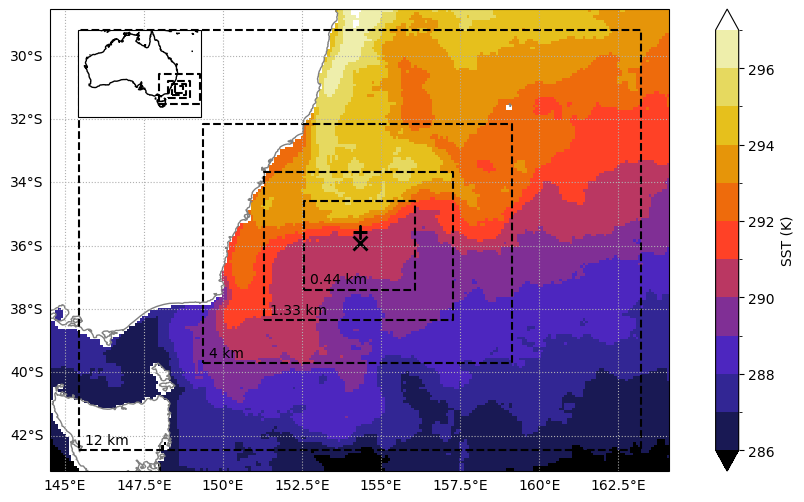

In [5]:
def get_extent(d):
    return  [d.XLONG.values.min(),d.XLONG.values.max()], [d.XLAT.values.min(),d.XLAT.values.max()]

def plot_extent(xlims,ylims,ax):
    ax.plot([xlims[0],xlims[1],xlims[1],xlims[0],xlims[0]],[ylims[0],ylims[0],ylims[1],ylims[1],ylims[0]],color="k",ls="--")

plt.figure(figsize=[12,6])
ax = plt.axes(projection=ccrs.PlateCarree())
for d,lab in zip([d01,d02,d03,d04],["12 km","4 km","1.33 km","0.44 km"]):
    xlims, ylims = get_extent(d)
    plot_extent(xlims,ylims,ax)
    ax.text(xlims[0]+0.2,ylims[0]+0.2,lab)
ax.coastlines(color="grey")
ax.gridlines(draw_labels=["bottom","left"],ls=":")
extent = ax.get_extent()
c = ramssa.isel(time=0).analysed_sst.plot(ax=ax,cmap=plt.get_cmap("CMRmap"),levels=np.linspace(286,297,12),add_colorbar=False)
cb = plt.colorbar(c)
cb.set_label("SST (K)")
ax.set_extent(extent)
plt.title("")
ax.plot(154.3239, -35.9070, marker="x", color="k", ms=10, mew=2)
ax.plot(154.333237, -35.581059, marker="+", color="k", ms=10, mew=2)
ax_inset = ax.inset_axes([0.044,0.76,0.2,0.2],projection=ccrs.PlateCarree())
ax_inset.set_extent([110,164,-45,-10])
ax_inset.coastlines()
for d in [d01,d02,d03,d04]:
    xlims, ylims = get_extent(d)
    plot_extent(xlims,ylims,ax_inset)
plt.savefig("/g/data/w40/ab4502/IN2023_V06/figs/map.jpeg",dpi=500,bbox_inches="tight")